In [1]:
from torchvision.datasets import ImageNet
from torchvision import transforms
image_size = 224
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
])
data_dir = "/root/autodl-tmp/imagenet/"
train_dataset = ImageNet(data_dir, split='train', transform=transform)
val_dataset = ImageNet(data_dir, split='val', transform=transform)

/root/miniconda3/envs/GPT/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import torch
from einops import rearrange
from torch import Tensor
from mask import patch_mask
from torch.utils.data import DataLoader

def show_images(images:Tensor):
    return transforms.ToPILImage()(images)

def make_grid(images:Tensor, ncol: int):
    images = rearrange(images, '(nr nc) c h w -> c (nr h) (nc w)', nc=ncol)
    return images

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
print(len(train_loader), len(val_loader))

40037 1563


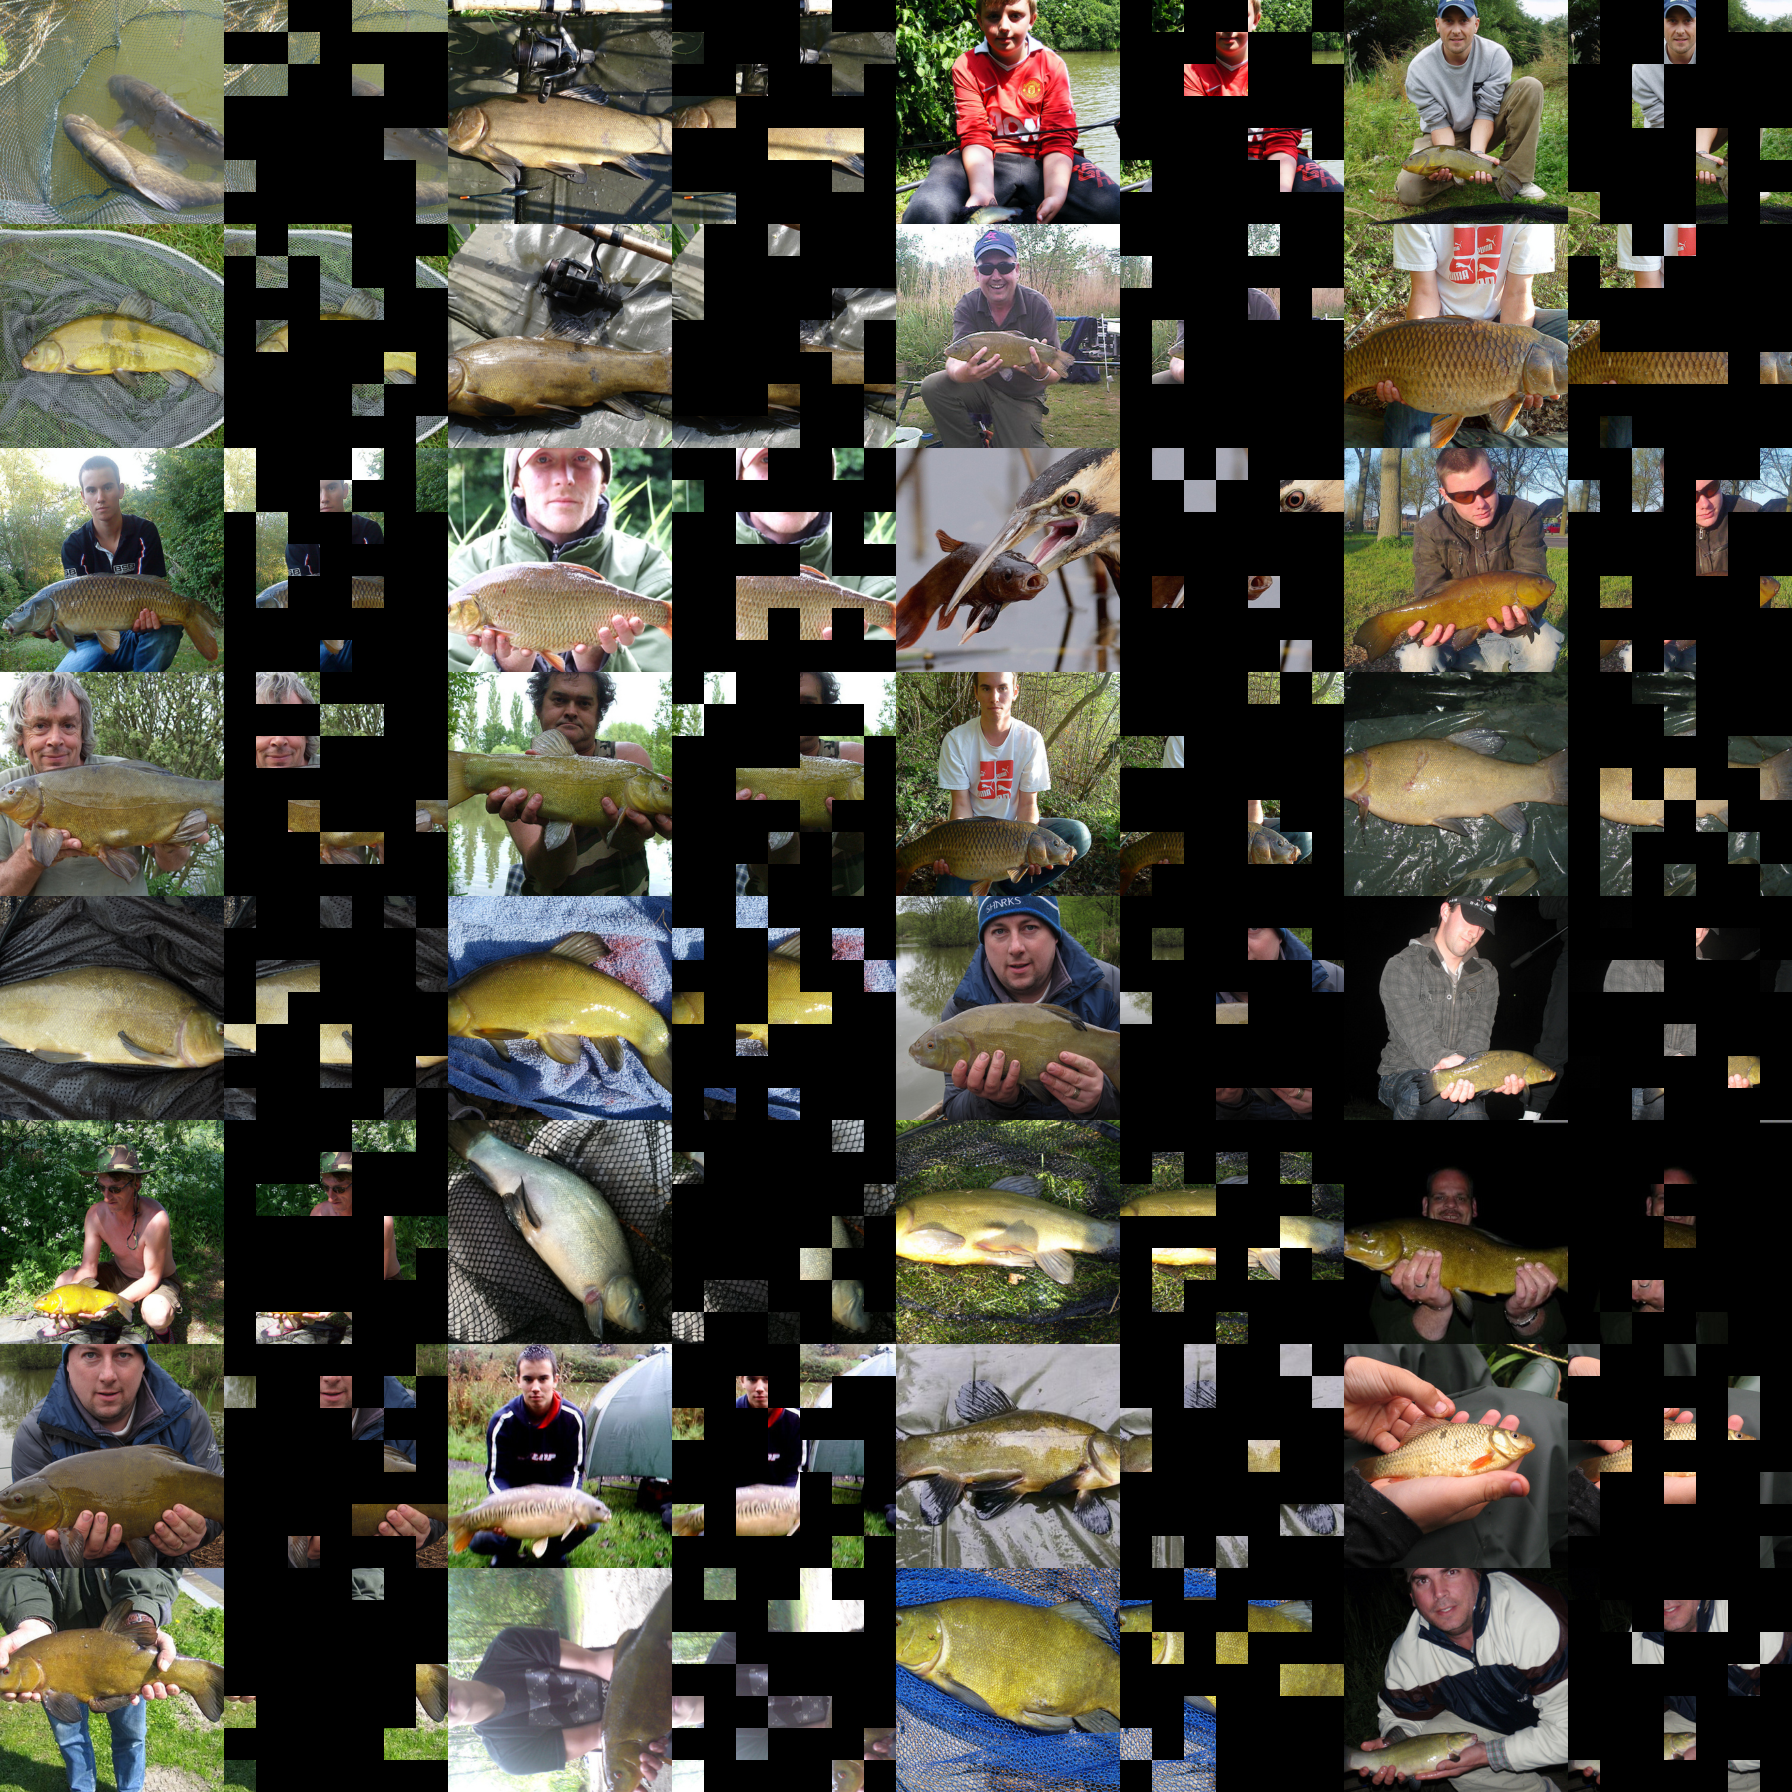

In [5]:
origin_images, _ = next(iter(val_loader))
masked_images = patch_mask(origin_images, mask_prob=0.75, patch_size=32)

origin_grid = make_grid(origin_images, 1)
masked_grid = make_grid(masked_images, 1)

concat_grid = torch.cat([origin_grid, masked_grid], dim=-1)

concat_grid = rearrange(concat_grid, 'c (b h) w -> b c h w', h = image_size)
concat_grid = make_grid(concat_grid, 4)

show_images(concat_grid)